---
title: "Unsupervised Learning"
format:
    html: 
        code-fold: false
---

# Brief Introduction

In this section we will employ dimensionality reduction techniques and clustering methods. These will include principal component analysis (PCA), t-distributed stochastic neighbor embedding (t-SNE), K-Means, DBSCAN, and hierarchical clustering. The objective is to explore the different methods, investigate the dataset further, and understand any consistent patterns that may help answer our guiding Data Science questions..

# Overview of Methods

- Principal Component Analysis (PCA) is used to reduce the dimensionality of a dataset. It uses statistical techniques to find the features that are most important to the dataset. PCA will yield the projection of the variables onto the first two principal components (their span), which represent the directions of maximum variance. This can then be represented visually to understand the linear relationships within the data.
  - n_components: number of components to keep

- t-distributed Stochastic Neighbor Embedding (t-SNE) is a technique for dimensionality reduction used for visualizing high-dimensional data. It is often used to visualize the results of clustering algorithms. The plot of the t-SNE results will show points that have similar profiles or similar attributes close together. These points are then grouped into clusters. It is used to see if clusters exist and how defined and separated these clusters may be within the data.
  - n_components: number of components to keep
  - perplexity: manages the balance of the global and local structures

- K-Means Clustering works to minimize the within cluster variance in order to partition data into k-clusters. This is done by finding the centroid closest to a point, assinging the point to that centroid, calculating the new centroids, and repeating until the centroid stop shifting. It helps to find patterns within unlabeled data.
  - n_clusters: number of clusters to form
 
- Density-based spatial clustering (DBSCAN) is a density based clustering method that groups points together that have a lot of nearby neighboring points. It is useful to find clusters within data that are non-linear in shape.
  - eps: max distance allowed between two points to be considered a neighbor
  - min_samples: number of samples to be considered a cluster

- Hierarchical clustering is a clustering technique that creates groups of data that are nested (ie in a hierarchical structure). It does this iteratively by breaking the dataset into large groups and continuously breaking those large groups into more groups, creating a branching structure.
  - inputs: dataset and method

# Code 

In [384]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [385]:
# reading in the data
yelp_zip = pd.read_csv("../data-cleaning/clean_yelp_zip.csv")
cols_to_drop = "Unnamed: 0"
yelp_zip = yelp_zip.drop(columns=cols_to_drop)  # dropping the unnecessary columns
print(yelp_zip.head(5)) # checking the variables

   Median_Income  zip_code                        name       cuisine  \
0         133211   20001.0              Compass Coffee  Coffee & Tea   
1         133211   20001.0  Sankofa Video Books & Cafe    Bookstores   
2         133211   20001.0           La Colombe Coffee  Coffee & Tea   
3         133211   20001.0        Sylvan Cafe & Bakery      Bakeries   
4         133211   20001.0                 Urban Roast  Coffee & Tea   

   price_range  rating  review_count   latitude  longitude  price cuisine_cat  
0            2     4.1          92.0  38.916256 -77.022773   20.5       cafes  
1            1     4.5         167.0  38.925561 -77.023150    5.0       cafes  
2            2     4.0         303.0  38.901051 -77.020103   20.5       cafes  
3            1     4.0         134.0  38.915393 -77.012592    5.0       cafes  
4            2     3.4         921.0  38.898005 -77.024916   20.5       cafes  


## Dimensionality Reduction

### PCA

[0.26763243 0.18944621 0.15147403 0.13711514 0.11630842 0.08958895
 0.04648898 0.00194583]
[0.26763243 0.45707864 0.60855267 0.74566781 0.86197623 0.95156518
 0.99805417 1.        ]


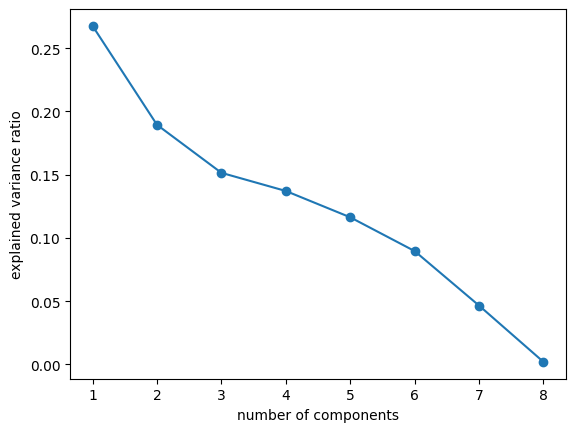

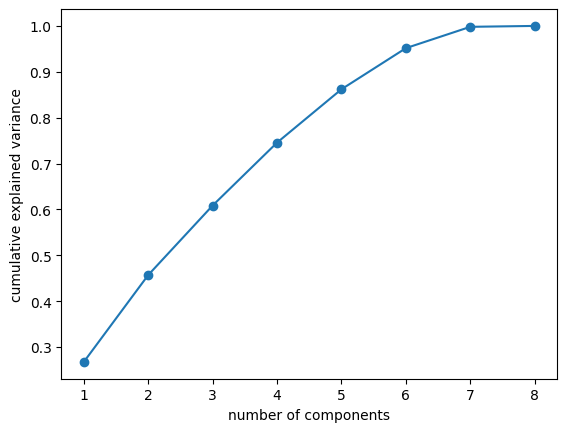

In [386]:
# Principal Component Analysis (PCA)

# pre-processing to use data in PCA
numeric_yelp = yelp_zip.drop(columns=['name', 'cuisine', 'cuisine_cat']) # keeping only numeric variables
scaler = StandardScaler() # initializing a scaler
yelp_scaled = scaler.fit_transform(numeric_yelp) # standardizing the variables
pca = PCA(n_components=8) # initiating a pca 
yelp_pca = pca.fit_transform(yelp_scaled) # reducing dimensionality

# explained variance to determine optimal number of features:
def plot_variance_explained(pca):
    """helper function to plot explained variance from lab 4.2"""
    # visualize variance explained by PCA components
    
    print(pca.explained_variance_ratio_[0:10])
    print(np.cumsum(pca.explained_variance_ratio_[0:10]))

    # plot explained variance ratio
    fig, ax = plt.subplots()
    ax.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o')
    ax.set(xlabel="number of components", ylabel="explained variance ratio")
    plt.show()

    # plot cumulative sum of explained variance
    fig, ax = plt.subplots()
    ax.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), marker='o')
    ax.set(xlabel="number of components", ylabel="cumulative explained variance")
    plt.show()
    
plot_variance_explained(pca)

Here we have plotted the explained variance versus the number of components and the cumulative explained variance versus the number of components. These plots together are meant to help choose the number of components to utilize in intializing a PCA object. Generally, we look for an "elbow point" in the first plot, where the explained variance begins to taper off, however, the plot lacks a true elbow point, thus, we will look mostly at the cumulative explained variance plot for out decision. Based on the first plot, we are looking somewhere in the 4-7 components, range and then we must decide how we want to balance the total variance retained and the model complexity. We are going to decide to choose 6 components to retain about 95% of the variance and proceed with the principal component analysis utilizing this number.

In [387]:
def plot_2D(X,color_vector):
    """Utility plotting function taken from lab 4.2"""
    fig, ax = plt.subplots()
    ax.scatter(X[:,0], X[:,1],c=color_vector, alpha=0.5) #, c=y
    ax.set(xlabel='PC-1 ', ylabel='PC-2',
    title='Principal Component Analysis results')
    ax.grid()
    plt.show()
    
pca = PCA(n_components=6) # initiating a pca 
yelp_pca = pca.fit_transform(yelp_scaled) # reducing dimensionality

cuisine_colors = yelp_zip['cuisine_cat'].astype('category').cat.codes # converting cuisine to categorical codes
income_colors = yelp_zip['Median_Income'].astype('category').cat.codes
rating_colors = yelp_zip['rating'].astype('category').cat.codes
review_colors = yelp_zip['review_count'].astype('category').cat.codes
zip_colors = yelp_zip['zip_code'].astype('category').cat.codes
price_colors = yelp_zip['price_range'].astype('category').cat.codes

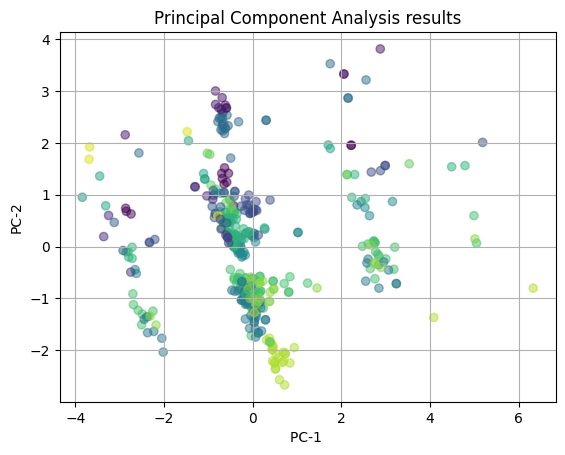

In [388]:
# plotting the PCA color coded by the Income values
plot_2D(yelp_pca, income_colors)

In the above plot, we are showing the PCA results with color-coding of the median income levels. We see that there are potential clusters like the light green at the bottom of the plot and the large cluster at (0,1). However, there is a large amount of overlap in the clusters and no clear distribution of the points, indicating that is likely that the influence of cuisine types on the PCA captured patterns is not meaningul. There seems to be no clear strong correlation between the features of the restaurant (median income of area, zipcode, price range, yelp rating, review count, latitude, and longitude) and the income of the surronding area. 

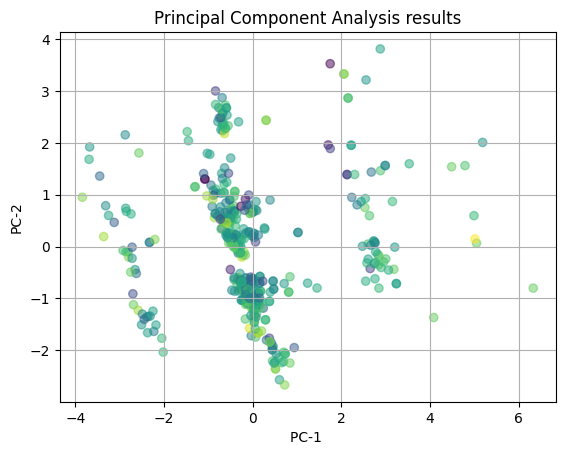

In [389]:
# plotting the PCA color coded by the Yelp ratings
plot_2D(yelp_pca, rating_colors)

We then tried to visualize the same PCA with the yelp ratings as the color-coding. Again, we see there is a large amount of overlap in the clusters and almost no clear clusters that are separate from the other clusters. This indicating that it is likely that the influence on the PCA captured patterns is not meaningul for yelp ratings. Again, there is no clear correlation between the features of the restaurant and the yelp rating that the restaurant receives. 

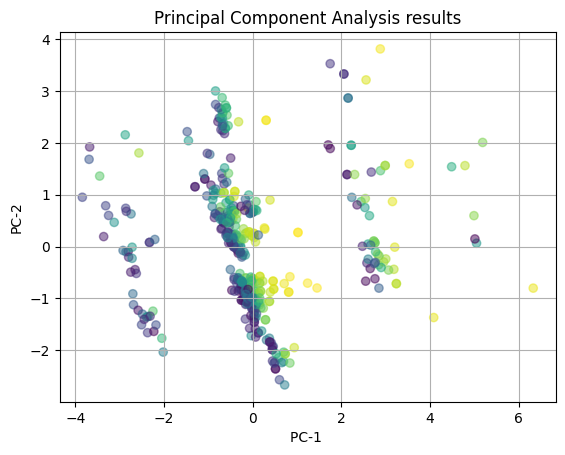

In [390]:
# plotting the PCA color coded by the number of reviews
plot_2D(yelp_pca, review_colors)

Next, we again with visualizing the PCA with the number of reviews as the color-coding. We see that there is somewhat of a striping pattern here where the colors seem to aggregate in a vertical fashion. However, these clusters appear at each of the x-coordinates of the plot, making the pattern less clear. There is still a decent amount of overlap, thus we cannot fully conclude either way if there is a correlation between the features of the restaurant and the number of reviews that the restaurant receives. 

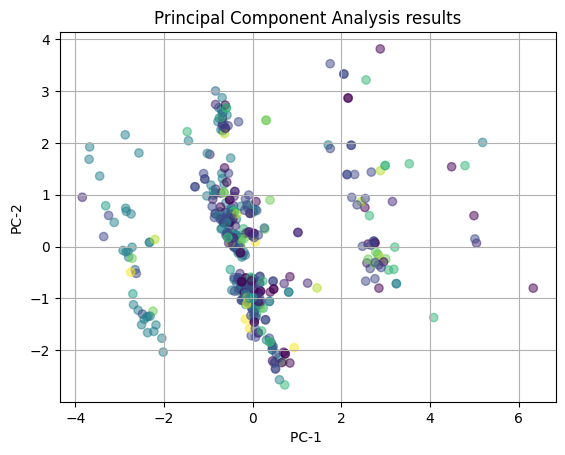

In [391]:
# plotting the PCA color coded by the cusine categories
plot_2D(yelp_pca, cuisine_colors)

Finally, we color-code the PCA results with the cuisine categories. We see that there is almost complete overlap between clusters and no clear distribution of the points, indicating that is likely that the influence of cuisine types on the PCA captured patterns is not meaningul. We can conclude from the plot that there is no strong correlation between the features of the restaurant and the type of cuisine the restaurant is. 

### t-SNE

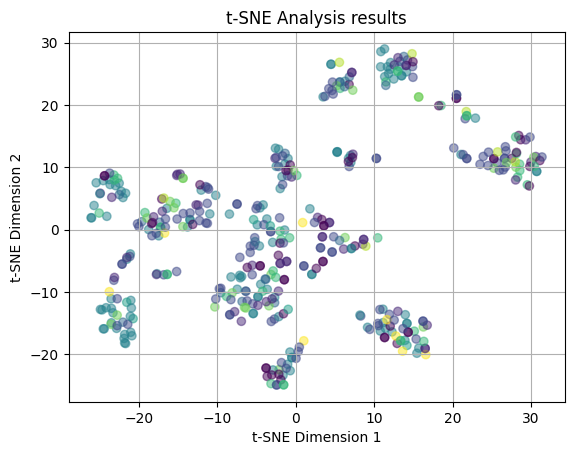

In [392]:
# T-SNE 
# with cuisine
def plot_2D(X,color_vector):
    """Utility plotting function taken from lab 4.2, reusing for t-SNE"""
    fig, ax = plt.subplots()
    ax.scatter(X[:,0], X[:,1],c=color_vector, alpha=0.5) #, c=y
    ax.set(xlabel='t-SNE Dimension 1', ylabel='t-SNE Dimension 2',
    title='t-SNE Analysis results')
    ax.grid()
    plt.show()

tsne = TSNE(n_components=2) # initiating tsne
yelp_tsne = tsne.fit_transform(yelp_scaled)
plot_2D(yelp_tsne, cuisine_colors)

The above plot is the results of the t-SNE process, which as was said in the introduction, attempts to visualize high-dimensional data in a low-dimensional space. The plot shows that t-SNE produced no distinct clusters. Here the colors are coded by the cuisine types and we see that the points are clearly dispersed throughout the plot in no clear patterns. There is a lot of overlap between points, which indicates that the cuisine types are not clearly distinct from each other in terms of the restaurant features that make up the types.

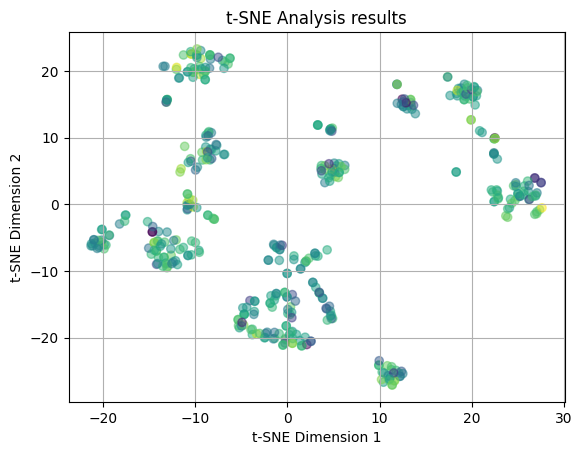

In [393]:
numeric_yelp = yelp_zip.drop(columns=['name', 'cuisine', 'cuisine_cat', 'rating']) # keeping only numeric variables
scaler = StandardScaler() # initializing a scaler
yelp_scaled = scaler.fit_transform(numeric_yelp) # standardizing the variables

tsne = TSNE(n_components=2) # initiating tsne
yelp_tsne = tsne.fit_transform(yelp_scaled)
plot_2D(yelp_tsne, rating_colors)

This t-SNE plot is utilizing the Yelp ratings for color coding. The points are distributed throughout the plot in no clear patterns. Again, there is a large amount of overlap between points, which indicates that the Yelp ratings are distributed across the restaurant features pretty randomly.

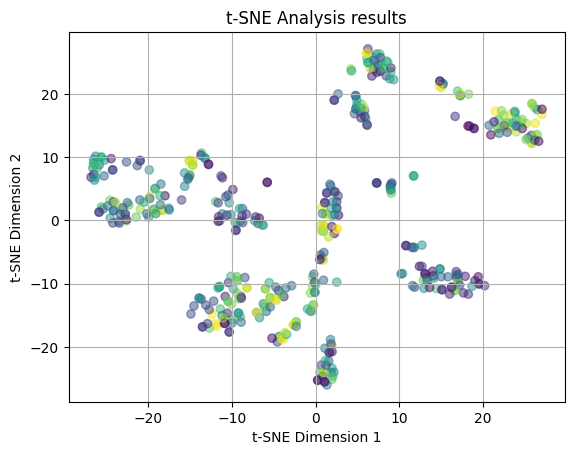

In [394]:
numeric_yelp = yelp_zip.drop(columns=['name', 'cuisine', 'cuisine_cat', 'review_count']) # keeping only numeric variables
scaler = StandardScaler() # initializing a scaler
yelp_scaled = scaler.fit_transform(numeric_yelp) # standardizing the variables

tsne = TSNE(n_components=2) # initiating tsne
yelp_tsne = tsne.fit_transform(yelp_scaled)
plot_2D(yelp_tsne, review_colors)

We attempted another t-SNE plot is with the review counts for color coding. Again, we see no clear clustering patterns amoung the points and there is a lot of overlap between the coloring. We are seeing that the review count is also not strongly related to the features of the restaurant.

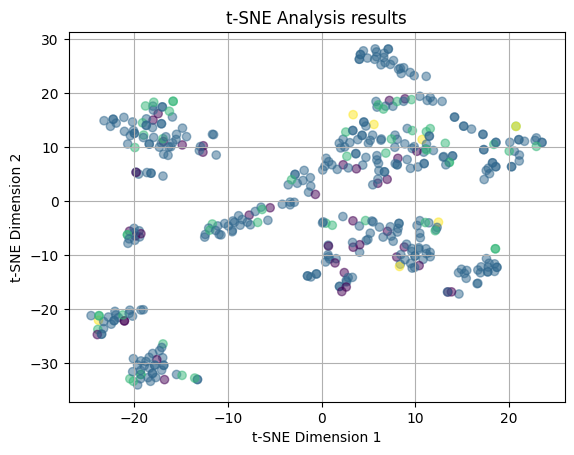

In [395]:
numeric_yelp = yelp_zip.drop(columns=['name', 'cuisine', 'cuisine_cat', 'price_range', 'price']) # keeping only numeric variables
scaler = StandardScaler() # initializing a scaler
yelp_scaled = scaler.fit_transform(numeric_yelp) # standardizing the variables

tsne = TSNE(n_components=2) # initiating tsne
yelp_tsne = tsne.fit_transform(yelp_scaled)
plot_2D(yelp_tsne, price_colors)

Next, we attempted again the t-SNE plot, but with the price ranges for color coding. Again, we see no clear clustering patterns amoung the points and there is a lot of overlap between the coloring. We are seeing that the price range of a restaurant is also not strongly related to the features.

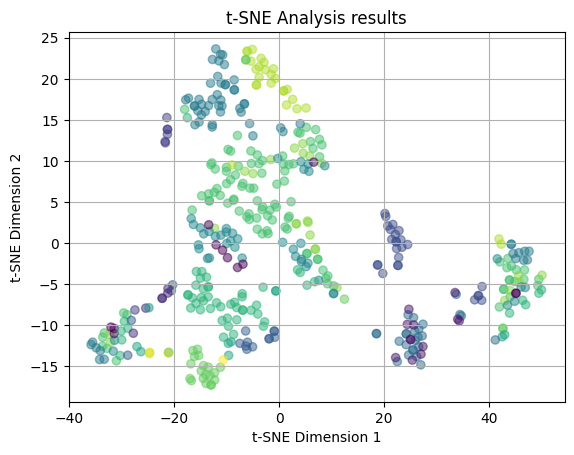

In [396]:
numeric_yelp = yelp_zip.drop(columns=['name', 'cuisine', 'cuisine_cat', 'Median_Income']) # keeping only numeric variables
scaler = StandardScaler() # initializing a scaler
yelp_scaled = scaler.fit_transform(numeric_yelp) # standardizing the variables

tsne = TSNE(n_components=2) # initiating tsne
yelp_tsne = tsne.fit_transform(yelp_scaled)
plot_2D(yelp_tsne, income_colors)

In our last t-SNE attempt, we plotted the t-SNE results with the Median Income values of the zipcode where the restaurnt is located as the colors. This lead to somewhat more interesting results as there is less overlap and some potential loose clustering occurring. We can see that there is a teal clutser around (-10, 20) that may be a distinct cluster, however, there are some outliers for this grouping. There is also a light green cluster situated to the right of this cluster, again that has a pattern, but with outliers. The rest of the clusters are mostly overlapping and dispersed throughout the plot. This leads us to believe that there may be some relation between the median income and the features of the restaurant, however, in specific cases and not across the board for all restaurants and income brackets. 

We now played around with the perplexity values for the t-SNE results, utilizing perplexity of 5, 30, and 50. The perplexity is used to manage the balance of the global and local structures within the data. Lower values of perplexity will focus more on the local structure, while a higher perplexity will focus more on the global structure. These will be visualized with color codings for Yelp rating and Median Income. These two were choosen because Yelp rating is most aligned with our reserach questions of understanding what makes us a yelp rating and because median income showed the most preliminary clustering in the above plots. 

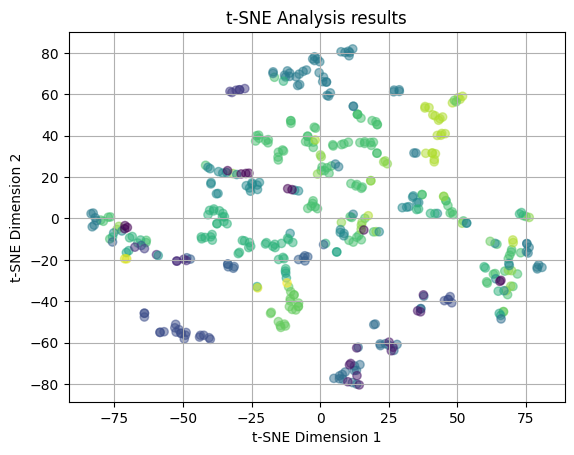

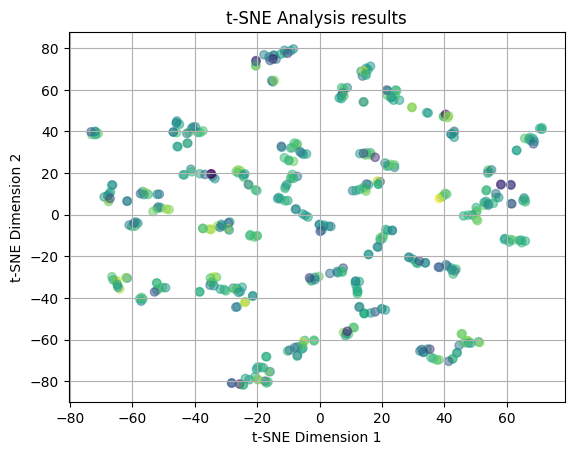

In [397]:
# experimenting with different perplexity values
# perplexity = 5

numeric_yelp = yelp_zip.drop(columns=['name', 'cuisine', 'cuisine_cat', 'Median_Income']) # keeping only numeric variables
scaler = StandardScaler() # initializing a scaler
yelp_scaled = scaler.fit_transform(numeric_yelp) # standardizing the variables
tsne_5 = TSNE(n_components=2, perplexity=5)
yelp_tsne5 = tsne_5.fit_transform(yelp_scaled)

plot_2D(yelp_tsne5, income_colors)

numeric_yelp = yelp_zip.drop(columns=['name', 'cuisine', 'cuisine_cat', 'rating']) # keeping only numeric variables
scaler = StandardScaler() # initializing a scaler
yelp_scaled = scaler.fit_transform(numeric_yelp) # standardizing the variables
tsne_5 = TSNE(n_components=2, perplexity=5)
yelp_tsne5 = tsne_5.fit_transform(yelp_scaled)

plot_2D(yelp_tsne5, rating_colors)

In the two plots above, we have plotted the t-SNE results utilizing a perplexity value of 5 (as opposed to the default value of 30). In the first plot, we color code with the median income values and the second plot is color coded with the yelp ratings. In both of the plots, we see that the points are distributed across the plots in no clear pattern. There is a large amount of overlap and no emerging clusters, thus we can say that there is no relation between the features of the restaurant and the median income and yelp rating when looking at the local structure of the dataset.

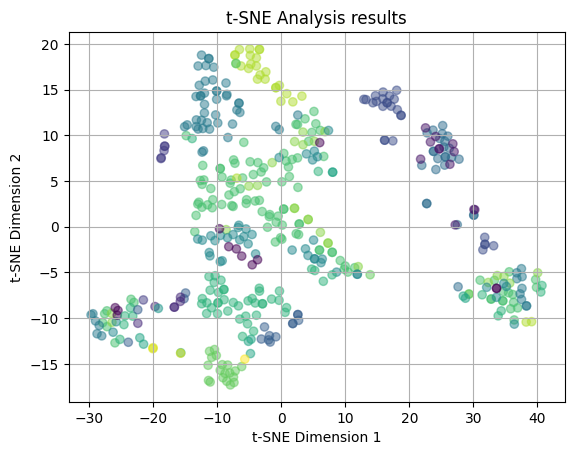

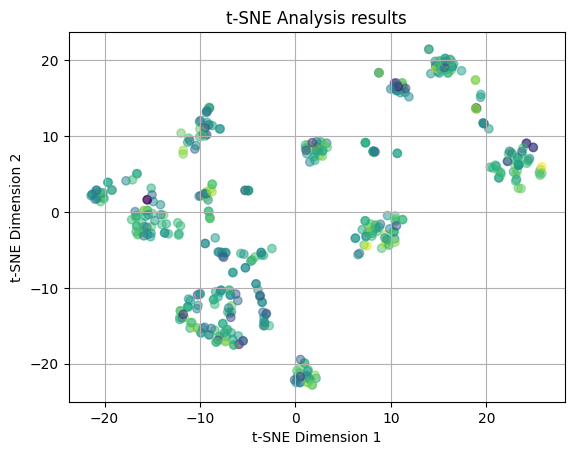

In [398]:
# perplexity = 35

numeric_yelp = yelp_zip.drop(columns=['name', 'cuisine', 'cuisine_cat', 'Median_Income']) # keeping only numeric variables
scaler = StandardScaler() # initializing a scaler
yelp_scaled = scaler.fit_transform(numeric_yelp) # standardizing the variables
tsne_35 = TSNE(n_components=2, perplexity=35)
yelp_tsne35 = tsne_35.fit_transform(yelp_scaled)

plot_2D(yelp_tsne35, income_colors)

numeric_yelp = yelp_zip.drop(columns=['name', 'cuisine', 'cuisine_cat', 'rating']) # keeping only numeric variables
scaler = StandardScaler() # initializing a scaler
yelp_scaled = scaler.fit_transform(numeric_yelp) # standardizing the variables
tsne_35 = TSNE(n_components=2, perplexity=35)
yelp_tsne35 = tsne_35.fit_transform(yelp_scaled)

plot_2D(yelp_tsne35, rating_colors)

We then plotted the t-SNE results utilizing a perplexity value of 35 (which is still relatively close to the default value of 30). Again, the plots are color coded by median income values and yelp ratings, respectively. In the second plot, we again see that the points are distributed across the plots in no clear pattern and there are no emerging clusters, thus we can say that there is no relation between the features of the restaurant and yelp rating when looking more at the global structure of the data. However, looking at teh median income plot, we see the light green and teal clusters near (-10, 15), indicating there may be some emerging relation between the features of the restaurant and the income of the neighborhood.

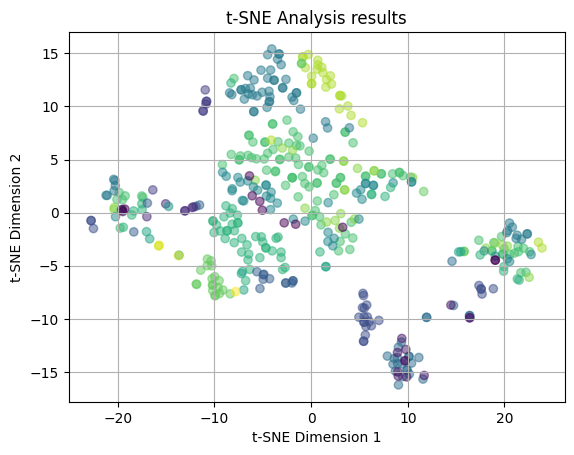

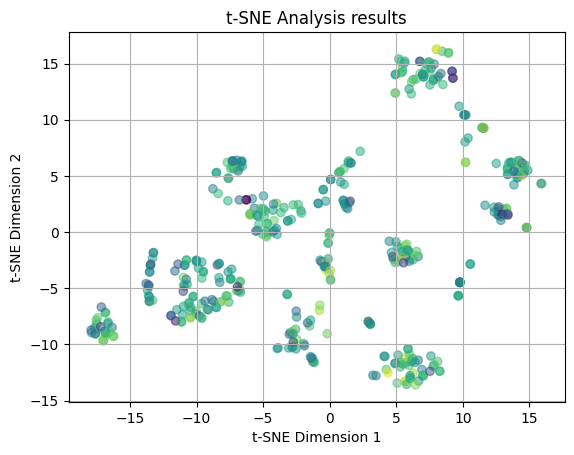

In [399]:
# experimenting with different perplexity values
# perplexity = 50

numeric_yelp = yelp_zip.drop(columns=['name', 'cuisine', 'cuisine_cat', 'Median_Income']) # keeping only numeric variables
scaler = StandardScaler() # initializing a scaler
yelp_scaled = scaler.fit_transform(numeric_yelp) # standardizing the variables
tsne_50 = TSNE(n_components=2, perplexity=50)
yelp_tsne50 = tsne_50.fit_transform(yelp_scaled)

plot_2D(yelp_tsne50, income_colors)

numeric_yelp = yelp_zip.drop(columns=['name', 'cuisine', 'cuisine_cat', 'rating']) # keeping only numeric variables
scaler = StandardScaler() # initializing a scaler
yelp_scaled = scaler.fit_transform(numeric_yelp) # standardizing the variables
tsne_50 = TSNE(n_components=2, perplexity=50)
yelp_tsne50 = tsne_50.fit_transform(yelp_scaled)

plot_2D(yelp_tsne50, rating_colors)

We finally plot the t-SNE results utilizing a perplexity value of 50 (which is more than the 30 and 35 and will look at the global structure of the data). Again, the plots are color coded by median income values and yelp ratings, respectively. In the second plot, we again see that the points are distributed across the plots in no clear pattern and there are no emerging clusters, thus we can say that there is no relation between the features of the restaurant and yelp rating when looking more at the global structure of the data. However, looking at the median income plot, we see the light green and teal clusters near (-10, 15) and are also seeing an emerging loose cluster of green near (0,10). This could again indicate there may be some emerging relation between the features of the restaurant and the income of the neighborhood, especially when we account for the global structure of the data and look at more broad relationships between points.

### Comparison

When we performed the principal component analysis and t-SNE, we overwhelming, found little to no significant results. The PCA yielded that there was no correlation between the features of the restaurant and the median income level, the yelp rating, the number of yelp reviews, and the cuisine type. The t-SNE results backed up this finding by making clear that there was no relationship between the restaurant features and the cuisine type, the yelp rating, the number of reviews, and the price range. T-SNE did, however, begin to show a slight clustering in the relationship between the features of the restaurant and the median income level of the surronding area. This clustering was extremely slight and there was still alot of overlapping and outliers. This clustering began to appear more as the perplexity value increased, however, this pattern may be explained by the relationship between median income and zip code and was too slight to make a true conclusion about the relationship.  The small difference in the result is potentially due to the bias from the zip code or from the difference in the technique of PCA and t-SNE. T-SNE is a non-linear method, so it may have been able to find the small relationship in the between income and the features because it was more apparent in the global structure, which was seen as the perplexity value increased. Overall, we come to no true conclusions about the relationship between the features of the restaurant.

## Clustering Methods

In [400]:
# pre-processing steps

# scaling the numeric features
scaler = StandardScaler() # initializing a scaler
scaled_nums = scaler.fit_transform(yelp_zip[['Median_Income', 'zip_code', 'price_range', 'rating', 'review_count', 'latitude', 'longitude', 'price']])
yelp_zip[['Median_Income', 'zip_code', 'price_range', 'rating', 'review_count', 'latitude', 'longitude', 'price']] = scaled_nums

print(yelp_zip.head(5))
yelp_zip = yelp_zip.drop(columns = ['name', 'cuisine', 'cuisine_cat'])

   Median_Income  zip_code                        name       cuisine  \
0       0.488229 -0.731905              Compass Coffee  Coffee & Tea   
1       0.488229 -0.731905  Sankofa Video Books & Cafe    Bookstores   
2       0.488229 -0.731905           La Colombe Coffee  Coffee & Tea   
3       0.488229 -0.731905        Sylvan Cafe & Bakery      Bakeries   
4       0.488229 -0.731905                 Urban Roast  Coffee & Tea   

   price_range    rating  review_count  latitude  longitude     price  \
0    -0.120364  0.023268     -0.653447  0.673732   0.156349 -0.208398   
1    -2.054779  1.125458     -0.530862  1.299282   0.137330 -1.642612   
2    -0.120364 -0.252279     -0.308575 -0.348487   0.291018 -0.208398   
3    -2.054779 -0.252279     -0.584799  0.615718   0.669956 -1.642612   
4    -0.120364 -1.905564      0.701521 -0.553228   0.048241 -0.208398   

  cuisine_cat  
0       cafes  
1       cafes  
2       cafes  
3       cafes  
4       cafes  


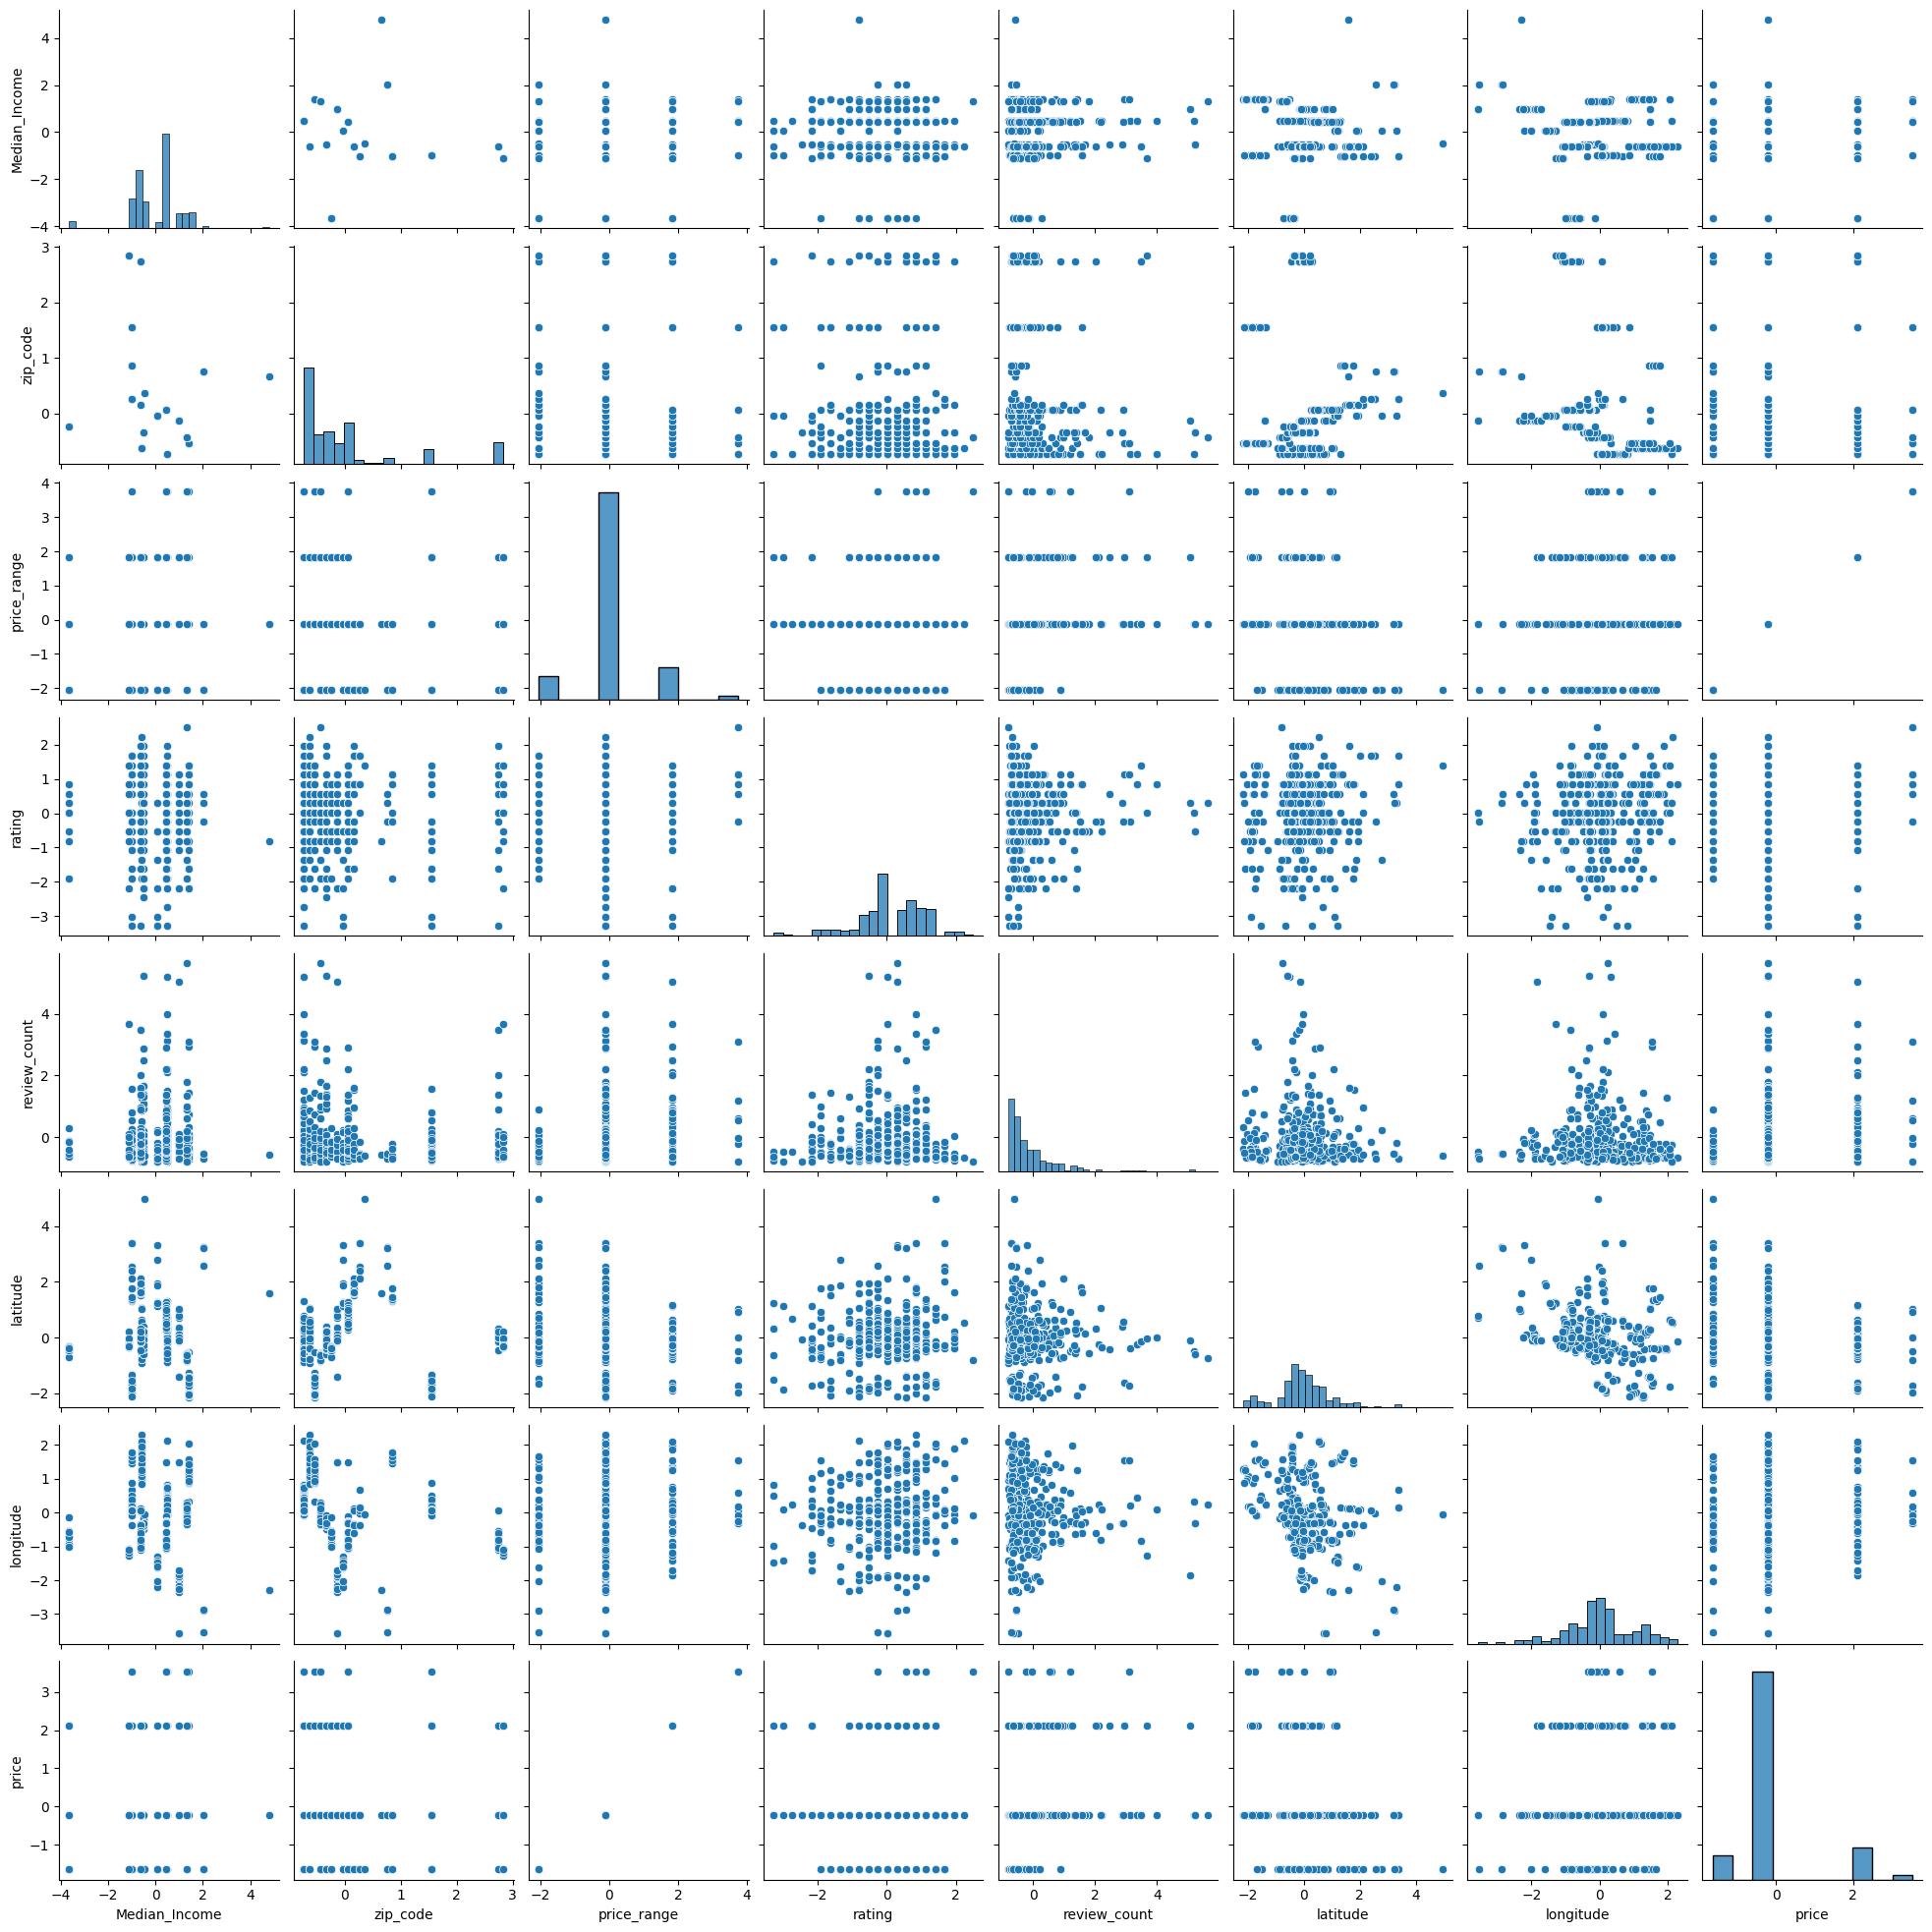

In [401]:
# checking for highly correlated features
sns.pairplot(yelp_zip)

There are no clear correlated features that need to be removed for the further analysis.

In [402]:
# checking the values are standardized
print(yelp_zip.head(10))

   Median_Income  zip_code  price_range    rating  review_count  latitude  \
0       0.488229 -0.731905    -0.120364  0.023268     -0.653447  0.673732   
1       0.488229 -0.731905    -2.054779  1.125458     -0.530862  1.299282   
2       0.488229 -0.731905    -0.120364 -0.252279     -0.308575 -0.348487   
3       0.488229 -0.731905    -2.054779 -0.252279     -0.584799  0.615718   
4       0.488229 -0.731905    -0.120364 -1.905564      0.701521 -0.553228   
5       0.488229 -0.731905    -0.120364 -2.181111      0.415491  0.433059   
6       0.488229 -0.731905    -0.120364  0.574363      0.101674  0.015760   
7       0.488229 -0.731905    -0.120364  0.849911      3.354251 -0.253399   
8       0.488229 -0.731905    -0.120364  0.298816     -0.256273 -0.375423   
9       0.488229 -0.731905    -0.120364  0.298816     -0.674695  0.283428   

   longitude     price  
0   0.156349 -0.208398  
1   0.137330 -1.642612  
2   0.291018 -0.208398  
3   0.669956 -1.642612  
4   0.048241 -0.208398  
5 

### K-Means

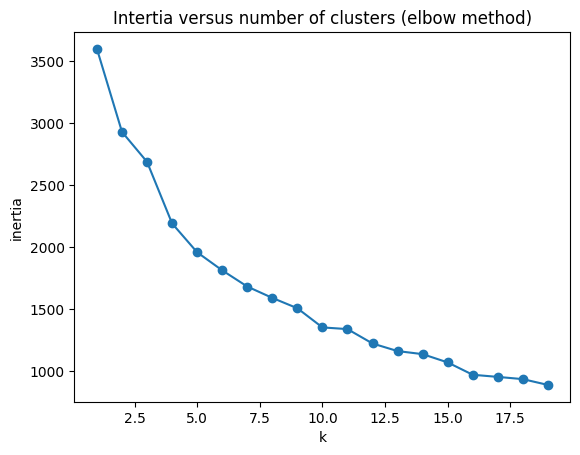

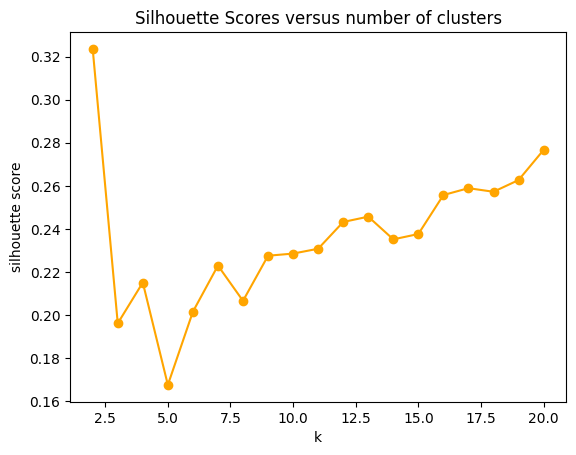

In [403]:
# K-Means

def kmean_fit(k): # kmean function 
    """KMean funciton taken from lab 4.1"""
    global yelp_zip, model
    model=KMeans(n_clusters=k,max_iter=5000,tol=1e-6)
    model.fit(yelp_zip)
    return model.inertia_

ks=[]
inertias=[]
for k in range(1,20):
    inertia=kmean_fit(k)
    ks.append(k)
    inertias.append(inertia)

plt1 = plt.plot(ks,inertias,"-o")
plt.title('Intertia versus number of clusters (elbow method)')
plt.xlabel('k')
plt.ylabel('inertia')
plt.show(plt1)

### Silhouette Score
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20] # different possible number of clusters
sil_scores = [] # initalizing empty list for silhouette scores

for n_clusters in range_n_clusters: # looping through the number of clusters
    clusterer = KMeans(n_clusters=n_clusters, random_state=10) # using Kmeans with each cluster value
    cluster_labels = clusterer.fit_predict(yelp_zip)  # getting the labels
    silhouette_avg = silhouette_score(yelp_zip, cluster_labels) # getting the silhoeutte score
    sil_scores.append(silhouette_avg)

plt2 = plt.plot(range_n_clusters, sil_scores, "-o", color='orange') # plotting number of clusters and silhouette score
plt.title('Silhouette Scores versus number of clusters')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.show(plt2)

Above we have plotted the inertia versus the number of clusters and the silhouette score versus the number of clusters. These plots together are meant to help choose the number of clusters to utilize in intializing k-Means. Generally, we look for an "elbow point" in the first plot, where the inertia begins to taper off, however, the plot lacks a true elbow point, thus, we will look mostly at the silhoeutte score for the decision. Based on the first plot, we are looking somewhere in the 5-12 cluster range. We are going to decide to choose 7 clusters to obtain a relatively high silhouette score.

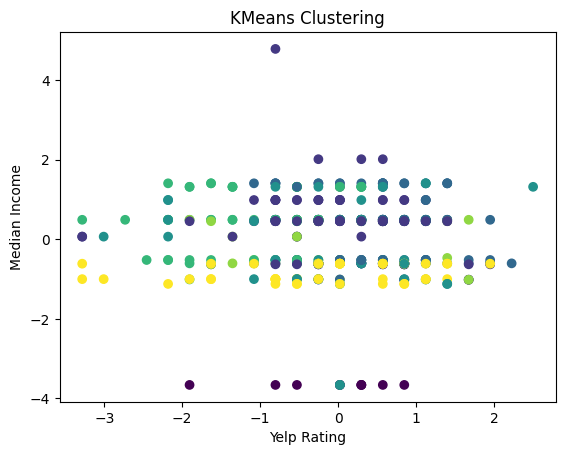

In [404]:
# Initializing K Means with optimal k value
k = 7 # based on the silhouette scores
model = KMeans(n_clusters=k, max_iter=5000, tol=1e-6)
model.fit(yelp_zip)
labels = model.predict(yelp_zip)

# Scatter plot of the clusters using ratings and median income
plt.scatter(yelp_zip['rating'], yelp_zip['Median_Income'], c=labels, cmap='viridis')
plt.title('KMeans Clustering')
plt.xlabel('Yelp Rating')
plt.ylabel('Median Income')
plt.show()

In the above plot we see the yelp ratings plotted against the median income with K-Means clustering. The plot shows no clear clusters, lots of overlap, and points that are dispersed across both axes. This indicates that there is no strong correlation between the yelp rating and the median income of the area.

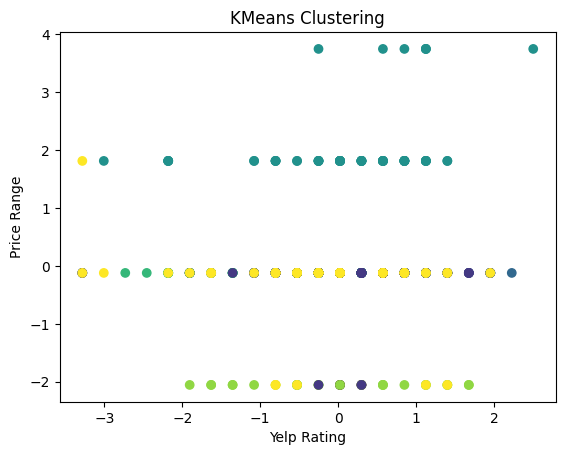

In [405]:
# Scatter plot of the clusters using ratings and price range
plt.scatter(yelp_zip['rating'], yelp_zip['price_range'], c=labels, cmap='viridis')
plt.title('KMeans Clustering')
plt.xlabel('Yelp Rating')
plt.ylabel('Price Range')
plt.show()

In the above plot we see the yelp ratings plotted against the price ranges with K-Means clustering. The plot shows no clear clusters, lots of overlap, and points that are dispersed across both axes. This indicates that there is no strong correlation between the yelp rating and the price range of the restaurant.

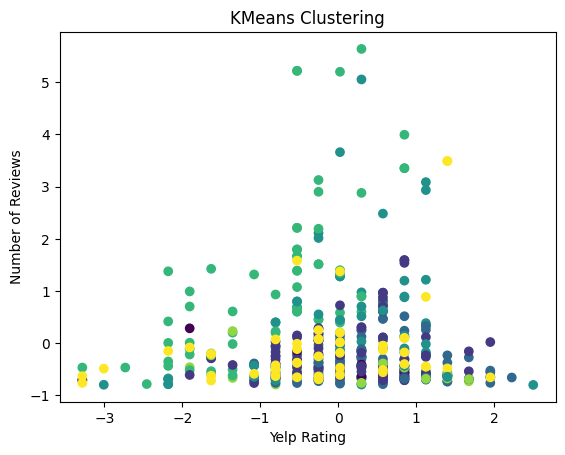

In [406]:
# Scatter plot of the clusters using ratings and review count
plt.scatter(yelp_zip['rating'], yelp_zip['review_count'], c=labels, cmap='viridis')
plt.title('KMeans Clustering')
plt.xlabel('Yelp Rating')
plt.ylabel('Number of Reviews')
plt.show()

In the above plot we see the yelp rating plotted against the number of reviews with K-Means clustering. The plot shows only one potential cluster, which is the green color towards the top of the graph. This would point to more reviews having highing rating, but it is not a strong cluster. Other than that there are no clear clusters and the points that are dispersed across both axes. This indicates that there is small potential for some correlation between the yelp rating and the number of reviews, but in a small subset and not across the board.

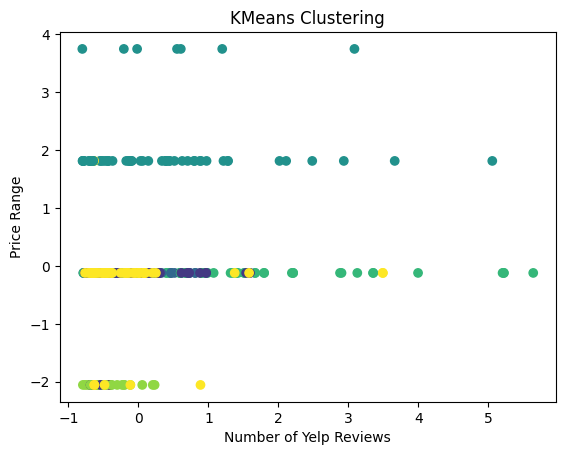

In [407]:
# Scatter plot of the clusters using review count and price range
plt.scatter(yelp_zip['review_count'], yelp_zip['price_range'], c=labels, cmap='viridis')
plt.title('KMeans Clustering')
plt.xlabel('Number of Yelp Reviews')
plt.ylabel('Price Range')
plt.show()

In the above plot we see the price range plotted against the number of Yelp reviews with K-Means clustering. The plot shows no clear clusters and the points are very dispersed across both axes. This indicates that there is no strong correlation between the price range of the restaurant and the number of yelp reviews.

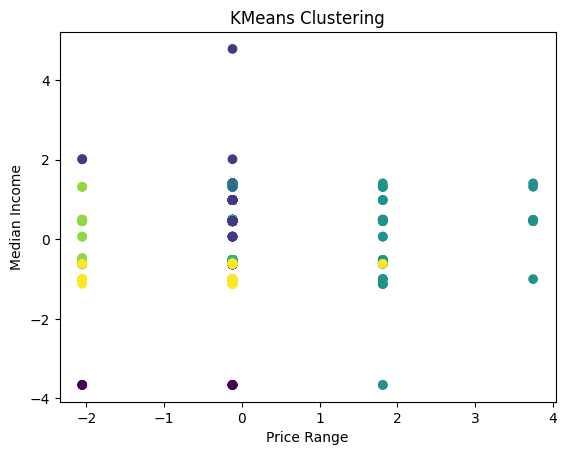

In [408]:
# Scatter plot of the clusters using price range and median income
plt.scatter(yelp_zip['price_range'], yelp_zip['Median_Income'], c=labels, cmap='viridis')
plt.title('KMeans Clustering')
plt.xlabel('Price Range')
plt.ylabel('Median Income')
plt.show()

Finally, we plotted the median income against the price range utilizing K-Means clustering. The plot again shows no clear clusters and the points are very dispersed across both axes. This indicates that there is no strong correlation between the price range of the restaurant and the median income.

In [409]:
# used CHATGPT for help with 3D plot
yelp_clustered = pd.DataFrame(yelp_zip, columns=['rating', 'price_range', 'review_count'])
yelp_clustered['cluster'] = labels

fig = px.scatter_3d(
    yelp_clustered,
    x='rating',                # X-axis
    y='price_range',           # Y-axis
    z='review_count',          # Z-axis
    color='cluster',           # Color points by cluster
    symbol='cluster',          # Optional: Different symbols for each cluster
    hover_data=['rating', 'price_range', 'review_count'],  # Show details on hover
    title='Interactive 3D Clustering of Yelp Data'
)

fig.update_traces(marker=dict(size=5))  # Adjust marker size
fig.update_layout(scene=dict(
    xaxis_title='Rating',
    yaxis_title='Price Range',
    zaxis_title='Review Count'
))
fig.show()

In the above plot we try to utilize a 3D plot to visualize the review count, price range and the rating see the price range with K-Means clustering. The plots shows a potential cluster of the purple x's which appear towards the top of the plot. This again, points to a potential relationship between the number of reviews and the yelp rating of the restaurant for the two middle price ranges. Again, this lends to a loose conclusion about having more reviews having a slight positive effect on the yelp rating. the other clusters are relatively less strong and are more overlapping.

### DBSCAN

0.20967415255007046
(1.0, 2)


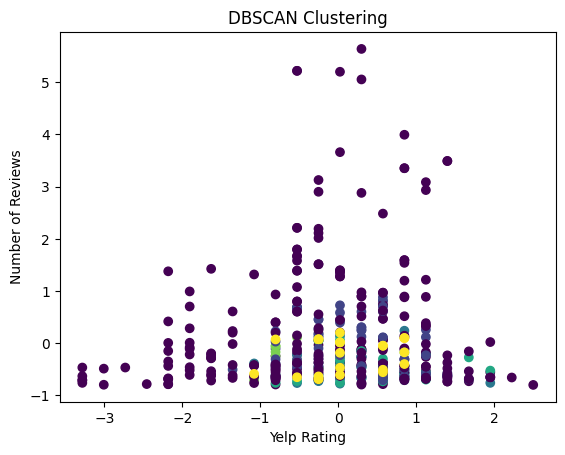

In [410]:
# DBSCAN
# modified from lab 4.1

range_eps= [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0] # possible values of epsilon (hyperparameter)
range_samples = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] # possible number of samples (hyperparameter)
sil_scores = [] # silhouette scores
max = -1 # initiailizing a max value
eps_and_sample = []

for epsilon in range_eps: # iterating through both of the hyperparamters
    for sample in range_samples:
        clustering = DBSCAN(eps=epsilon, min_samples=sample).fit(yelp_zip) # using DBSCAN
        cluster_labels = clustering.labels_  # getting the cluster values
        if len(set(cluster_labels)) > 1 and -1 in cluster_labels:  # ignoring the noise
            silhouette_avg = silhouette_score(yelp_zip, cluster_labels) # getting the silhouette scores
            sil_scores.append(silhouette_avg)
            if silhouette_avg > max: # if the silhouette score is greater than the current max value
                max = silhouette_avg # make this the new max
                eps_and_sample.append((epsilon, sample)) # save the hyperparamter values
print(max)
print(eps_and_sample[-1]) # get only the hyperparamters for the max value

eps = 0.9 # from the results above
min_samples = 10
clustering = DBSCAN(eps=eps, min_samples=min_samples) # initialize DBSCAN with optimal hyperparameters
cluster_labels = clustering.fit_predict(yelp_zip) 

plt.scatter(yelp_zip['rating'], yelp_zip['review_count'], c=cluster_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Yelp Rating')
plt.ylabel('Number of Reviews')
plt.show()

In the above, we visualized the number of reviews against the yelp ratings utilizing DBSCAN clustering. The plot shows no clear clusters as the points of each color are dispersed across the yelp axis and the points are mostly noise. This indicates that there is no strong correlation between the number of reviews and the yelp rating.

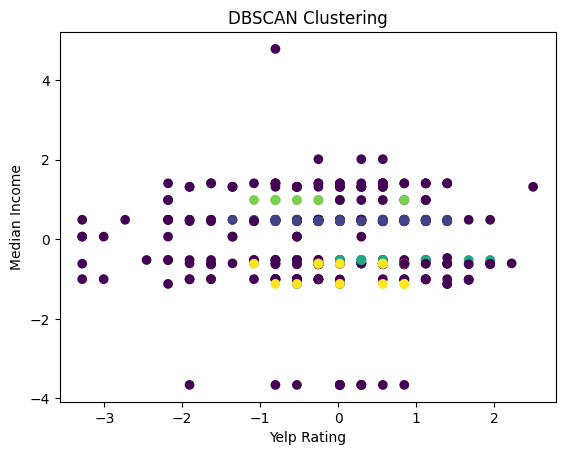

In [411]:
# DBSCAN rating and income
plt.scatter(yelp_zip['rating'], yelp_zip['Median_Income'], c=cluster_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Yelp Rating')
plt.ylabel('Median Income')
plt.show()

We then used the same technique of DBSCAN to visualize the number of reviews against the median income. We find that the plot shows no clear clusters, dispersed points, and mostly points that would be classified as noise. This indicates that there is no strong correlation between the number of reviews and the surronding's area median income.

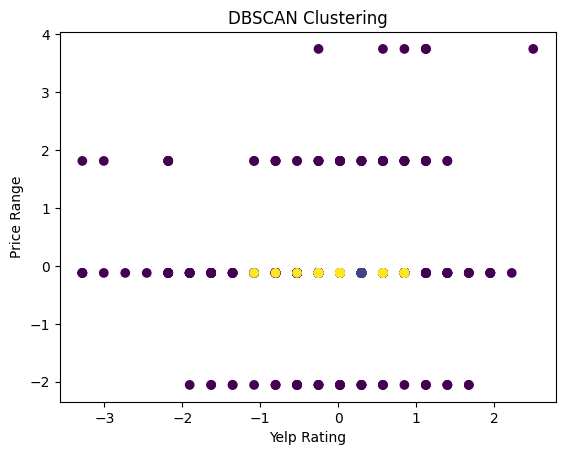

In [412]:
# DBSCAN rating and price
plt.scatter(yelp_zip['rating'], yelp_zip['price_range'], c=cluster_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Yelp Rating')
plt.ylabel('Price Range')
plt.show()

Finally, we tried to visualize the Yelp rating and the price range of the restaurant. We find that the plot shows no clear clusters as the points of each color are dispersed across the yelp axis. This indicates that there is no strong correlation between the Yelp rating and the price range of the restaurant.

### Hierarchical Clustering

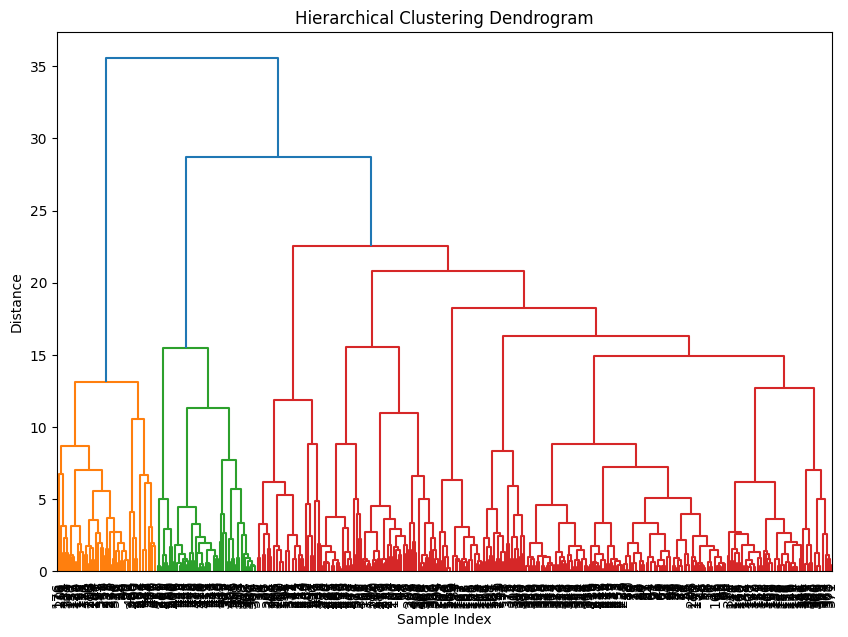

In [413]:
# Hierarchical clustering
linkage_matrix = linkage(yelp_zip, method='ward') # creating linkage matrix

# plotting the hierarchical clustering (utilized CHATGPT for help here)
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, labels=yelp_zip.index, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

num_clusters = 4 # from dendogram inspection
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')
yelp_zip['Cluster'] = clusters

In the above plot, we visualized a dendogram utilizing hierarchical clustering on the Yelp data. The dendogram splits the data into 3 color clusters. The red and green clusters are the most similar because they have the smallest height of their joining link, however, this link is still relatively high as it is about 28 in terms of distance, indicating low similarity. The similarity between orange and the mix of green and red is even higher at about 35 on the distance axis. This seems to indicate that there are not any truly similar clusters and likely no natural clusters within the dataset.

# Summary and Intepretation

In this section we employed dimensionality reduction through principal component analysis (PCA), t-distributed stochastic neighbor embedding (t-SNE) as well as clustering through K-Means, DBSCAN, and hierarchical clustering. The objective was to explore the different methods, compare their effectiveness, and understand any consistent patterns within the Yelp dataset. By and large we found little significant results and patterns within the data. 

Beginning with the PCA we found no correlation between the different features of the restaurant and the median income level, the yelp rating, the number of yelp reviews, and the cuisine type of the restaurant. For t-SNE we found no relationship between the restaurant features and the cuisine type, the yelp rating, the number of reviews, and the price range. There was a small relationship between the features of the restaurant and the median income level, which appeared more clearly with higher perplexity values, however, it was too insignficant a cluster to make a true comment about the relationship between the number of reviews and the yelp rating. Overall, both of these dimensionality reduction techniques yielded little significant findings. 

We then moved to clustering methods, particularly K-Means. With this method, we found no strong correlation between yelp rating and income, yelp rating and price range, price range and number of reviews, price range and median income level. There was no clear clustering. There was some correlation present between the number of reviews and the yelp rating, which was more prevelant when utilizing the 3D model and become apparent for the mid-range pricing restaurants. When we utilized DBSCAN there was no correlation and clustering in every case; between number of reviews and yelp rating, betwween number of reviews and median income, and between yelp rating and price range. In addition, the hierarchical clustering showcased that there were no natural clusterings in the data.

Overall, the results were too sparse and inconclusive for us to find any significant and reappearing patterns within the dataset. This may lead us to find that restaurants are quite unique entities and yelp ratings are hard to group and predict. 